In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
import numpy as np
import trees
from trees.ddt import *
import mpld3
import seaborn as sns
sns.set_style('white')
from tqdm import tqdm
from sklearn.decomposition import PCA
import networkx as nx

"\nALL_CONSTRAINTS = {\n    generate_constraint('killer+whale', 'antelope', 'beaver'),\n    generate_constraint('killer+whale', 'antelope', 'grizzly+bear'),\n    generate_constraint('killer+whale', 'antelope', 'dalmatian'),\n    generate_constraint('killer+whale', 'dalmatian', 'beaver'),\n    generate_constraint('killer+whale', 'grizzly+bear', 'beaver'),\n    generate_constraint('antelope', 'dalmatian', 'beaver'),\n    generate_constraint('antelope', 'grizzly+bear', 'beaver'),\n    generate_constraint('dalmatian', 'grizzly+bear', 'killer+whale'),\n    generate_constraint('dalmatian', 'grizzly+bear', 'antelope'),\n    generate_constraint('dalmatian', 'grizzly+bear', 'beaver'),\n}\n"

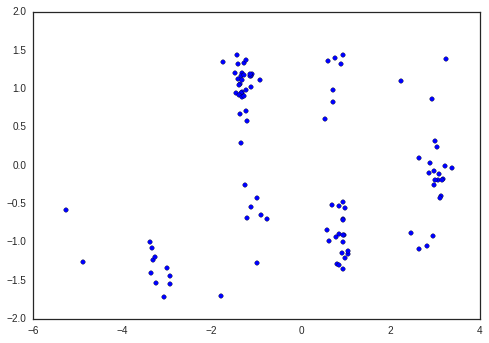

In [18]:
X, y = trees.data.load('zoo')
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X += np.random.normal(scale=.15, size=X.shape)
max = 200
X = X[:max]
y = y[:max]
N, D = X.shape
scatter(*X.T);
interactor = trees.interact.Interactor(X, y, trees.interact.Database('../zoo.db'))
constraints = set([])
def plot_tree(ddt):
    scatter(*X.T)
    def plot_node(node, size=40):
        if isinstance(node, Leaf):
            return
        scatter(*node.state, color='g', alpha=0.5,s=size)
        for child in node.children:
            plot(*zip(node.state, child.state), color='g', alpha=0.2)
            plot_node(child, size=size/2)
    plot_node(ddt.root)
def generate_constraint(a, b, c):
    return tuple(map(lambda x: y.index(x), (a, b, c)))
"""
ALL_CONSTRAINTS = {
    generate_constraint('killer+whale', 'antelope', 'beaver'),
    generate_constraint('killer+whale', 'antelope', 'grizzly+bear'),
    generate_constraint('killer+whale', 'antelope', 'dalmatian'),
    generate_constraint('killer+whale', 'dalmatian', 'beaver'),
    generate_constraint('killer+whale', 'grizzly+bear', 'beaver'),
    generate_constraint('antelope', 'dalmatian', 'beaver'),
    generate_constraint('antelope', 'grizzly+bear', 'beaver'),
    generate_constraint('dalmatian', 'grizzly+bear', 'killer+whale'),
    generate_constraint('dalmatian', 'grizzly+bear', 'antelope'),
    generate_constraint('dalmatian', 'grizzly+bear', 'beaver'),
}
"""

In [35]:
df = Inverse(c=1)
lm = GaussianLikelihoodModel(sigma=np.cov(X.T) / 8.0, sigma0=np.eye(D) / 2.0, mu0=X.mean(axis=0)).compile()
ddt = InteractiveDirichletDiffusionTree(df, lm, constraints=interactor.interactions[:200])
sampler = MetropolisHastingsSampler(ddt, X)
sampler.initialize_assignments()
#assert sampler.ddt.verify_constraints(ALL_CONSTRAINTS)
mpld3.display(sampler.ddt.plot_mpld3(y))

INFO:root:Compiling <Inverse> object...
INFO:root:Done compiling <Inverse> object.
INFO:root:Compiling <GaussianLikelihoodModel> object...
INFO:root:Done compiling <GaussianLikelihoodModel> object.


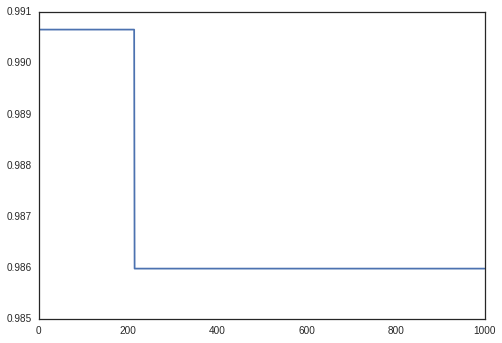

In [36]:
logger.setLevel(logging.INFO)
scores = []
for i in tqdm(xrange(1000)):
    scores.append(sampler.ddt.score_constraints(interactor.interactions) / float(len(interactor.interactions)))
    #assert sampler.ddt.verify_constraints(interactor.interactions)
    sampler.sample();
plot(scores)

In [28]:
len(interactor.interactions)

214

In [ ]:
for constraint in ALL_CONSTRAINTS:
    if not sampler.ddt.verify_constraint(constraint):
        print constraint

In [ ]:
list(sampler.ddt.point_index(i)[1][0] for i in (2, 0, 4))

In [7]:
mpld3.display(old_ddt.plot_mpld3(y))

In [ ]:
mpld3.display(sampler.ddt.plot_mpld3(y))

In [37]:
200 / 214.0

0.9345794392523364

In [ ]:
y.index('beaver')

In [ ]:
y[0]